## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# label encoding the data 
from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
  
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 
%matplotlib inline

## Loading the Data

In [2]:
df = pd.read_csv("Train.csv")
df.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [3]:
df.dtypes

X                                 float64
Y                                 float64
target_2015                       float64
elevation                         float64
precip 2014-11-16 - 2014-11-23    float64
precip 2014-11-23 - 2014-11-30    float64
precip 2014-11-30 - 2014-12-07    float64
precip 2014-12-07 - 2014-12-14    float64
precip 2014-12-14 - 2014-12-21    float64
precip 2014-12-21 - 2014-12-28    float64
precip 2014-12-28 - 2015-01-04    float64
precip 2015-01-04 - 2015-01-11    float64
precip 2015-01-11 - 2015-01-18    float64
precip 2015-01-18 - 2015-01-25    float64
precip 2015-01-25 - 2015-02-01    float64
precip 2015-02-01 - 2015-02-08    float64
precip 2015-02-08 - 2015-02-15    float64
precip 2015-02-15 - 2015-02-22    float64
precip 2015-02-22 - 2015-03-01    float64
precip 2015-03-01 - 2015-03-08    float64
precip 2015-03-08 - 2015-03-15    float64
precip 2019-01-20 - 2019-01-27    float64
precip 2019-01-27 - 2019-02-03    float64
precip 2019-02-03 - 2019-02-10    

In [4]:
df.describe()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
count,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,...,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.00000
mean,35.077656,-15.813802,0.076609,592.848206,1.610760,2.502058,1.162076,8.270610,8.892459,9.572821,...,35.637354,2.126234,3.453395,3.559366,9.127677,1.660709,0.526144,0.968101,1.585743,10.73175
std,0.392395,0.359789,0.228734,354.790357,4.225461,8.631846,4.396676,4.263375,3.760052,4.523767,...,14.519169,3.734829,8.007248,3.820294,6.868937,4.418032,1.494935,3.690698,4.651863,2.02610
min,34.260000,-16.640000,0.000000,45.541444,0.000000,0.000000,0.000000,1.411452,3.580342,1.254098,...,15.803429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
25%,34.760000,-16.070000,0.000000,329.063852,0.000000,0.000000,0.000000,5.548440,5.905440,6.179885,...,22.021763,0.000000,0.000000,0.000000,4.352528,0.000000,0.000000,0.000000,0.000000,9.00000
50%,35.050000,-15.800000,0.000000,623.000000,0.000000,0.000000,0.000000,7.941822,8.618390,8.786780,...,34.275716,0.896323,0.000000,2.607053,7.862453,0.000000,0.000000,0.000000,0.000000,10.00000
75%,35.390000,-15.520000,0.000000,751.434813,1.261848,0.000000,0.000000,10.887235,10.960668,12.670775,...,44.253897,2.076590,2.914996,6.390000,13.459070,0.000000,0.000000,0.000000,0.000000,12.00000
max,35.860000,-15.210000,1.000000,2803.303645,19.354969,41.023858,22.020803,18.870675,23.044340,21.757828,...,72.123185,16.403638,37.059980,12.979454,46.367849,19.475846,6.914834,18.170051,20.092777,17.00000


## Data Exploration

In [5]:
df.isna().sum()

X                                 0
Y                                 0
target_2015                       0
elevation                         0
precip 2014-11-16 - 2014-11-23    0
precip 2014-11-23 - 2014-11-30    0
precip 2014-11-30 - 2014-12-07    0
precip 2014-12-07 - 2014-12-14    0
precip 2014-12-14 - 2014-12-21    0
precip 2014-12-21 - 2014-12-28    0
precip 2014-12-28 - 2015-01-04    0
precip 2015-01-04 - 2015-01-11    0
precip 2015-01-11 - 2015-01-18    0
precip 2015-01-18 - 2015-01-25    0
precip 2015-01-25 - 2015-02-01    0
precip 2015-02-01 - 2015-02-08    0
precip 2015-02-08 - 2015-02-15    0
precip 2015-02-15 - 2015-02-22    0
precip 2015-02-22 - 2015-03-01    0
precip 2015-03-01 - 2015-03-08    0
precip 2015-03-08 - 2015-03-15    0
precip 2019-01-20 - 2019-01-27    0
precip 2019-01-27 - 2019-02-03    0
precip 2019-02-03 - 2019-02-10    0
precip 2019-02-10 - 2019-02-17    0
precip 2019-02-17 - 2019-02-24    0
precip 2019-02-24 - 2019-03-03    0
precip 2019-03-03 - 2019-03-

In [6]:
counter = 1
counter2 = 1
for col in df.columns:
    if 'precip 2014' in col:
        df.rename(columns = {col : f'precipitation_week{counter}_2015'}, inplace = True)
        counter = counter + 1
    elif 'precip 2015' in col:
        df.rename(columns = {col : f'precipitation_week{counter}_2015'}, inplace = True)
        counter = counter + 1
    elif 'precip 2019' in col:
        df.rename(columns = {col : f'precipitation_week{counter2}_2019'}, inplace = True)
        counter2 = counter2 + 1
df.rename(columns = {'LC_Type1_mode' : 'Land_type'}, inplace = True)

In [7]:
df.columns

Index(['X', 'Y', 'target_2015', 'elevation', 'precipitation_week1_2015',
       'precipitation_week2_2015', 'precipitation_week3_2015',
       'precipitation_week4_2015', 'precipitation_week5_2015',
       'precipitation_week6_2015', 'precipitation_week7_2015',
       'precipitation_week8_2015', 'precipitation_week9_2015',
       'precipitation_week10_2015', 'precipitation_week11_2015',
       'precipitation_week12_2015', 'precipitation_week13_2015',
       'precipitation_week14_2015', 'precipitation_week15_2015',
       'precipitation_week16_2015', 'precipitation_week17_2015',
       'precipitation_week1_2019', 'precipitation_week2_2019',
       'precipitation_week3_2019', 'precipitation_week4_2019',
       'precipitation_week5_2019', 'precipitation_week6_2019',
       'precipitation_week7_2019', 'precipitation_week8_2019',
       'precipitation_week9_2019', 'precipitation_week10_2019',
       'precipitation_week11_2019', 'precipitation_week12_2019',
       'precipitation_week13_2019'

In [8]:
df.Land_type.value_counts()

12    6151
10    4817
9     4008
17     542
14     427
11     166
4      131
2      122
5       52
13      42
8        7
7        1
Name: Land_type, dtype: int64

In [9]:
df.drop(['precipitation_week1_2015', 'precipitation_week2_2015', 'precipitation_week3_2015', 'precipitation_week4_2015','precipitation_week5_2015', 'precipitation_week6_2015', 'precipitation_week7_2015', 'precipitation_week8_2015', 'precipitation_week9_2015'], axis=1)

,X,Y,target_2015,elevation,precipitation_week10_2015,precipitation_week11_2015,precipitation_week12_2015,precipitation_week13_2015,precipitation_week14_2015,precipitation_week15_2015,...,precipitation_week10_2019,precipitation_week11_2019,precipitation_week12_2019,precipitation_week13_2019,precipitation_week14_2019,precipitation_week15_2019,precipitation_week16_2019,precipitation_week17_2019,Land_type,Square_ID
0,34.26,-15.91,0.0,887.764222,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,1.521829,29.389995,32.878318,8.179804,0.963981,16.659097,...,0.896323,1.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10,4e3c389a-14ce-11ea-bce5-f49634744a41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41
16462,35.86,-15.43,0.0,632.598892,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41
16463,35.86,-15.42,0.0,632.450136,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5dff-14ce-11ea-bce5-f49634744a41
16464,35.86,-15.41,0.0,629.272733,3.645338,18.531483,13.816063,23.728058,8.794998,9.369763,...,11.335339,30.984762,0.518269,5.770066,14.839779,4.928294,10.526186,18.746072,10,4e6f5e00-14ce-11ea-bce5-f49634744a41


In [10]:
df.drop(['precipitation_week9_2019', 'precipitation_week10_2019', 'precipitation_week11_2019', 'precipitation_week12_2019', 'precipitation_week13_2019', 'precipitation_week14_2019', 'precipitation_week15_2019', 'precipitation_week16_2019', 'precipitation_week17_2019'], axis = 1)

,X,Y,target_2015,elevation,precipitation_week1_2015,precipitation_week2_2015,precipitation_week3_2015,precipitation_week4_2015,precipitation_week5_2015,precipitation_week6_2015,...,precipitation_week1_2019,precipitation_week2_2019,precipitation_week3_2019,precipitation_week4_2019,precipitation_week5_2019,precipitation_week6_2019,precipitation_week7_2019,precipitation_week8_2019,Land_type,Square_ID
0,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,12.992620,4.582856,35.037532,4.796012,28.083314,0.000000,58.362456,18.264692,10,4e3c389a-14ce-11ea-bce5-f49634744a41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5dfd-14ce-11ea-bce5-f49634744a41
16462,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5dfe-14ce-11ea-bce5-f49634744a41
16463,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5dff-14ce-11ea-bce5-f49634744a41
16464,35.86,-15.41,0.0,629.272733,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,8.760326,5.177616,12.450319,17.289942,19.612179,10.909635,64.494171,15.940852,10,4e6f5e00-14ce-11ea-bce5-f49634744a41


In [11]:
df_2015 = df[['X','Y','target_2015','elevation','Land_type']]
df_2019 = df[['X', 'Y', 'elevation', 'Land_type']]

## Mean of 3 consecutive weeks - 2015

In [12]:
counter1 = 1
counter2 = 1
for col in df.columns:
    if '2015' in col and counter1 <= 7:
        df_2015[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2015'] + df[f'precipitation_week{counter1+1}_2015'])/2
        counter1 += 2
        counter2 += 1

<ipython-input-12-9f99d9cdae3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2015'] + df[f'precipitation_week{counter1+1}_2015'])/2


In [13]:
df_2015.head()

,X,Y,target_2015,elevation,Land_type,mean_1,mean_2,mean_3,mean_4
0,34.26,-15.91,0.0,887.764222,9,0.0,7.422013,13.395295,43.789204
1,34.26,-15.90,0.0,743.403912,9,0.0,7.422013,13.395295,43.789204
2,34.26,-15.89,0.0,565.728343,9,0.0,7.422013,13.395295,43.789204
3,34.26,-15.88,0.0,443.392774,10,0.0,7.422013,13.395295,43.789204
4,34.26,-15.87,0.0,437.443428,10,0.0,7.422013,13.395295,43.789204


<AxesSubplot:xlabel='X', ylabel='Y'>

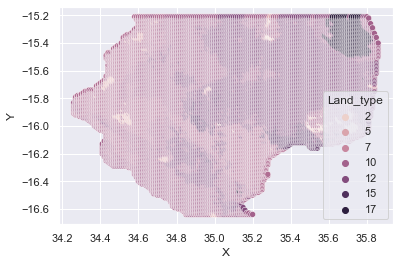

In [14]:
sns.scatterplot(x='X', y='Y', data=df, hue='Land_type')

<AxesSubplot:xlabel='X', ylabel='Y'>

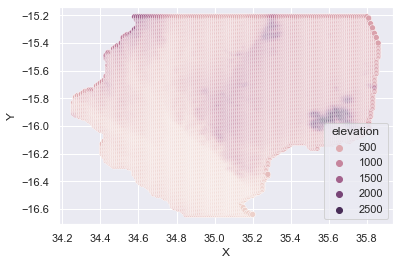

In [15]:
sns.scatterplot(x='X', y='Y', data=df, hue='elevation')

## Maximum within 3 consecutive weeks - 2015

In [21]:
maximum = 0
counter1 = 1
for col in df.columns:
    if ('2015' in col) and (counter1 <= 6):
        value = df[f'precipitation_week{counter1}_2015'] + df[f'precipitation_week{counter1+1}_2015'] + df[f'precipitation_week{counter1+2}_2015']
        maximum = np.maximum(maximum, value)
        counter1 += 1

In [22]:
df_2015['maximum_2015'] = maximum

<ipython-input-22-9ec0e9c01f95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['maximum_2015'] = maximum


In [23]:
df_2015.head()

,X,Y,target_2015,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2015
0,34.26,-15.91,0.0,887.764222,9,0.0,7.422013,13.395295,43.789204,99.816174
1,34.26,-15.90,0.0,743.403912,9,0.0,7.422013,13.395295,43.789204,99.816174
2,34.26,-15.89,0.0,565.728343,9,0.0,7.422013,13.395295,43.789204,99.816174
3,34.26,-15.88,0.0,443.392774,10,0.0,7.422013,13.395295,43.789204,99.816174
4,34.26,-15.87,0.0,437.443428,10,0.0,7.422013,13.395295,43.789204,99.816174


## Mean of 3 consecutive weeks - 2019

In [24]:
counter1 = 1
counter2 = 1
for col in df.columns:
    if '2019' in col and counter1 <= 7:
        df_2019[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2019'] + df[f'precipitation_week{counter1+1}_2019'])/2
        counter1 += 2
        counter2 += 1

<ipython-input-24-ef8c65411a3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019[f'mean_{counter2}'] = (df[f'precipitation_week{counter1}_2019'] + df[f'precipitation_week{counter1+1}_2019'])/2


In [25]:
df_2019.head()

,X,Y,elevation,Land_type,mean_1,mean_2,mean_3,mean_4
0,34.26,-15.91,887.764222,9,8.787738,19.916772,14.041657,38.313574
1,34.26,-15.90,743.403912,9,8.787738,19.916772,14.041657,38.313574
2,34.26,-15.89,565.728343,9,8.787738,19.916772,14.041657,38.313574
3,34.26,-15.88,443.392774,10,8.787738,19.916772,14.041657,38.313574
4,34.26,-15.87,437.443428,10,8.787738,19.916772,14.041657,38.313574


## Maximum within 3 consecutive weeks - 2019

In [26]:
maximum = 0
counter1 = 1
for col in df.columns:
    if ('2019' in col) and (counter1 <= 6):
        value = df[f'precipitation_week{counter1}_2019'] + df[f'precipitation_week{counter1+1}_2019'] + df[f'precipitation_week{counter1+2}_2019']
        maximum = np.maximum(maximum, value)
        counter1 += 1

In [27]:
df_2019['maximum_2019'] = maximum

<ipython-input-27-835739c6d0b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['maximum_2019'] = maximum


In [28]:
df_2019.head()

,X,Y,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2019
0,34.26,-15.91,887.764222,9,8.787738,19.916772,14.041657,38.313574,86.44577
1,34.26,-15.90,743.403912,9,8.787738,19.916772,14.041657,38.313574,86.44577
2,34.26,-15.89,565.728343,9,8.787738,19.916772,14.041657,38.313574,86.44577
3,34.26,-15.88,443.392774,10,8.787738,19.916772,14.041657,38.313574,86.44577
4,34.26,-15.87,437.443428,10,8.787738,19.916772,14.041657,38.313574,86.44577


<AxesSubplot:xlabel='X', ylabel='Y'>

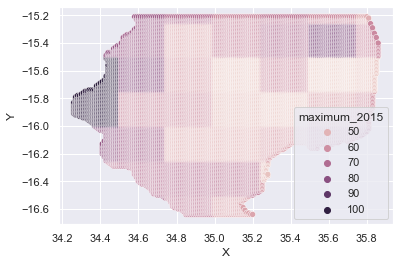

In [29]:
sns.scatterplot(x='X', y='Y', data=df_2015, hue='maximum_2015')

<AxesSubplot:xlabel='X', ylabel='Y'>

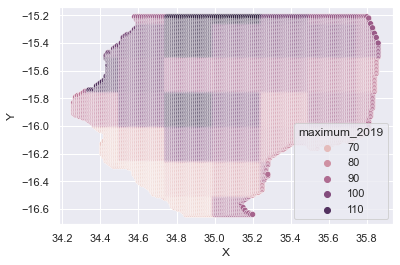

In [30]:
sns.scatterplot(x='X', y='Y', data=df_2019, hue='maximum_2019')

In [31]:
df_2015.head()

,X,Y,target_2015,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2015
0,34.26,-15.91,0.0,887.764222,9,0.0,7.422013,13.395295,43.789204,99.816174
1,34.26,-15.90,0.0,743.403912,9,0.0,7.422013,13.395295,43.789204,99.816174
2,34.26,-15.89,0.0,565.728343,9,0.0,7.422013,13.395295,43.789204,99.816174
3,34.26,-15.88,0.0,443.392774,10,0.0,7.422013,13.395295,43.789204,99.816174
4,34.26,-15.87,0.0,437.443428,10,0.0,7.422013,13.395295,43.789204,99.816174


In [32]:
df_2019.head()

,X,Y,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2019
0,34.26,-15.91,887.764222,9,8.787738,19.916772,14.041657,38.313574,86.44577
1,34.26,-15.90,743.403912,9,8.787738,19.916772,14.041657,38.313574,86.44577
2,34.26,-15.89,565.728343,9,8.787738,19.916772,14.041657,38.313574,86.44577
3,34.26,-15.88,443.392774,10,8.787738,19.916772,14.041657,38.313574,86.44577
4,34.26,-15.87,437.443428,10,8.787738,19.916772,14.041657,38.313574,86.44577


In [33]:
X = df_2015.drop(columns=['target_2015'], axis=1)
y = df_2015['target_2015']
X_train, X_test, y_train, y_test = train_test_split(X,y) # ensure reproductibility

In [34]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (12349, 9)
y_train (12349,)
X_test (4117, 9)
y_test (4117,)


In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
print(model.intercept_)

-4.402469520130046


In [37]:
model.coef_

array([ 0.10310251, -0.06886939, -0.00016685, -0.00999907,  0.00776323,
       -0.01146684, -0.00139587, -0.0103344 ,  0.00476692])

In [38]:
predictions = model.predict(X_test)
X = X_test.reset_index().copy()
X["target_2015"] = y_test.tolist()
X["prediction"] = predictions
X.head()

,index,X,Y,elevation,Land_type,mean_1,mean_2,mean_3,mean_4,maximum_2015,target_2015,prediction
0,13749,35.54,-16.02,1048.704898,9,0.819524,1.721406,9.674361,28.692691,65.430504,0.0,0.088615
1,10440,35.21,-15.75,902.435297,12,0.737941,4.063609,6.443157,20.576750,46.002189,0.0,-0.001317
2,11675,35.32,-15.99,689.188531,12,0.000000,3.591936,5.800687,19.507051,45.343441,0.0,0.070624
3,10589,35.22,-15.54,1002.321838,12,0.000000,2.895444,6.440811,18.842979,44.302029,0.0,-0.013931
4,16210,35.81,-15.69,762.253939,12,1.739562,1.871858,7.253451,17.951431,44.966976,0.0,0.133775


In [39]:
df.head()

,X,Y,target_2015,elevation,precipitation_week1_2015,precipitation_week2_2015,precipitation_week3_2015,precipitation_week4_2015,precipitation_week5_2015,precipitation_week6_2015,...,precipitation_week10_2019,precipitation_week11_2019,precipitation_week12_2019,precipitation_week13_2019,precipitation_week14_2019,precipitation_week15_2019,precipitation_week16_2019,precipitation_week17_2019,Land_type,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [40]:
for y, y_pred in list(zip(y_test, predictions))[:100]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 0.000 Estimated value: 0.08861
Real value: 0.000 Estimated value: -0.00132
Real value: 0.000 Estimated value: 0.07062
Real value: 0.000 Estimated value: -0.01393
Real value: 0.000 Estimated value: 0.13378
Real value: 0.000 Estimated value: 0.02180
Real value: 0.000 Estimated value: 0.05624
Real value: 0.000 Estimated value: -0.04671
Real value: 0.000 Estimated value: -0.03853
Real value: 0.016 Estimated value: 0.24202
Real value: 0.000 Estimated value: 0.00248
Real value: 0.000 Estimated value: -0.05513
Real value: 0.000 Estimated value: 0.08236
Real value: 0.032 Estimated value: 0.06515
Real value: 0.000 Estimated value: 0.07303
Real value: 0.000 Estimated value: 0.02363
Real value: 0.000 Estimated value: 0.11948
Real value: 0.000 Estimated value: 0.11640
Real value: 0.000 Estimated value: 0.05716
Real value: 0.585 Estimated value: 0.24237
Real value: 0.000 Estimated value: 0.11452
Real value: 0.000 Estimated value: -0.11954
Real value: 0.000 Estimated value: 0.03756
Real 

In [33]:
df['Land_type'] = df['Land_type'].apply(str)

In [34]:
land_types_be = df[["Land_type"]]

In [35]:
categorical_columns = df.select_dtypes([object, "category"]).columns

In [36]:
categorical_data = df[categorical_columns]

In [37]:
data_be = pd.get_dummies(
                                    land_types_be, 
                                    drop_first=True,
                                    dtype="int64"
)

In [38]:
data_with_be = pd.concat([
                            df,
                            data_be # reset index so it matches the numerical
                        ], axis=1
)

data_with_be

In [39]:
data_with_be

,X,Y,target_2015,elevation,precipitation_week1_2015,precipitation_week2_2015,precipitation_week3_2015,precipitation_week4_2015,precipitation_week5_2015,precipitation_week6_2015,...,Land_type_12,Land_type_13,Land_type_14,Land_type_17,Land_type_2,Land_type_4,Land_type_5,Land_type_7,Land_type_8,Land_type_9
0,34.26,-15.91,0.0,887.764222,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0,0,0,0,0,0,0,0,0,1
1,34.26,-15.90,0.0,743.403912,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0,0,0,0,0,0,0,0,0,1
2,34.26,-15.89,0.0,565.728343,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0,0,0,0,0,0,0,0,0,1
3,34.26,-15.88,0.0,443.392774,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0,0,0,0,0,0,0,0,0,0
4,34.26,-15.87,0.0,437.443428,0.000000,0.000000,0.000000,14.844025,14.552823,12.237766,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,35.86,-15.44,0.0,635.675022,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,0,0,0,0,0,0,0,0,0,0
16462,35.86,-15.43,0.0,632.598892,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,0,0,0,0,0,0,0,0,0,0
16463,35.86,-15.42,0.0,632.450136,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,0,0,0,0,0,0,0,0,0,0
16464,35.86,-15.41,0.0,629.272733,16.956563,31.155531,12.882013,8.810145,6.179829,9.863685,...,0,0,0,0,0,0,0,0,0,0
